In [1]:
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

Load data

In [2]:
def LoadData():
    # Fetch dataset
    wine_quality = fetch_ucirepo(id=186)

    # Extract features, quality, and color from the original dataset
    X = wine_quality.data.original.drop(columns=['quality', 'color'], errors='ignore')  
    y_quality = wine_quality.data.original['quality']  
    y_color = wine_quality.data.original['color']  

    # Standardize numerical features (excluding categorical attributes)
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    return X_scaled, X, y_quality, y_color  


In [3]:
X_scaled, X, y_quality, y_color = LoadData()
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [4]:
def describe_data():
    # Load the dataset
    X_scaled, X, y_quality, y_color = LoadData()

    # Combine all data into a single DataFrame for duplicate detection
    full_data = X.copy()
    full_data['quality'] = y_quality
    full_data['color'] = y_color

    # Check for duplicate rows
    num_duplicates = full_data.duplicated().sum()
    print(f"\nNumber of duplicate rows in the dataset: {num_duplicates}")

    # Remove duplicate rows if found
    if num_duplicates > 0:
        full_data = full_data.drop_duplicates().reset_index(drop=True)
        print("\nDuplicate rows removed.")
    else:
        print("\nNo duplicate rows detected.")

    # Separate back into individual components
    X_cleaned = full_data.drop(columns=['quality', 'color'], errors='ignore')
    y_quality_cleaned = full_data['quality']
    y_color_cleaned = full_data['color']

    # Dataset information
    print("\nDataset Information:")
    print(X_cleaned.info())  # Display types and non-null counts

    # Check for missing values
    missing_values = X_cleaned.isnull().sum()
    print("\nMissing Values in Each Column:")
    print(missing_values[missing_values > 0])  # Display only columns with missing values

    # Check for corrupted data (e.g., negative values in features where not expected)
    print("\nChecking for unexpected negative values:")
    for col in X_cleaned.columns:
        if (X_cleaned[col] < 0).any():
            print(f"Column {col} contains negative values.")

    # Attribute classification (discrete/continuous, nominal/ordinal/interval/ratio)
    attribute_types = {
        "fixed acidity": "Continuous, Ratio",
        "volatile acidity": "Continuous, Ratio",
        "citric acid": "Continuous, Ratio",
        "residual sugar": "Continuous, Ratio",
        "chlorides": "Continuous, Ratio",
        "free sulfur dioxide": "Continuous, Ratio",
        "total sulfur dioxide": "Continuous, Ratio",
        "density": "Continuous, Ratio",
        "pH": "Continuous, Interval",
        "sulphates": "Continuous, Ratio",
        "alcohol": "Continuous, Ratio",
        "quality": "Discrete, Ordinal",
        "color": "Discrete, Nominal"
    }

    print("\nAttribute Classification:")
    for attr, classification in attribute_types.items():
        print(f"{attr}: {classification}")

    # Summary statistics
    summary_stats = X_cleaned.describe()
    print("\nSummary Statistics of Features:")
    print(summary_stats)

    # Summary statistics for quality
    print("\nSummary Statistics for Quality:")
    print(y_quality_cleaned.describe())

    # Summary statistics for color
    print("\nWine Color Distribution:")
    print(y_color_cleaned.value_counts())

    # Reflections on summary statistics
    print("\nReflections on Summary Statistics:")
    print("- Features such as 'residual sugar' and 'total sulfur dioxide' have high variability.")
    print("- The 'quality' attribute is ordinal (discrete) and ranges between 3-9.")
    print("- Features like pH are in an interval scale, while most others are ratio-scaled.")
    print("- The dataset contains two wine types: red and white, which should be considered in modeling.")

    # Handling missing values (if any exist)
    if missing_values.sum() > 0:
        print("\nHandling Missing Values: Filling missing values with the median.")
        X_filled = X_cleaned.fillna(X_cleaned.median())
    else:
        print("\nNo missing values detected.")
        X_filled = X_cleaned

    return X_filled, y_quality_cleaned, y_color_cleaned  # Return cleaned dataset if needed for further analysis

In [5]:
X, y_quality, y_color = describe_data()


Number of duplicate rows in the dataset: 1177

Duplicate rows removed.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5320 non-null   float64
 1   volatile_acidity      5320 non-null   float64
 2   citric_acid           5320 non-null   float64
 3   residual_sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free_sulfur_dioxide   5320 non-null   float64
 6   total_sulfur_dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
dtypes: float64(11)
memory usage: 457.3 KB
None

Missing Values in Each Column:
Series([], dtype: int64)

Checking for unexpected negati

In [6]:
import pandas as pd

def summarize_data(X, y_quality, y_color):
    # Compute summary statistics
    summary_stats = X.describe().T  # Transpose for better readability

    # Add the count of unique values for categorical variables
    y_summary = pd.DataFrame({
        "count": [y_quality.count(), y_color.count()],
        "mean": [y_quality.mean(), None],  # Only mean makes sense for quality
        "std": [y_quality.std(), None],  # Standard deviation for quality
        "min": [y_quality.min(), None],
        "25%": [y_quality.quantile(0.25), None],
        "50%": [y_quality.median(), None],
        "75%": [y_quality.quantile(0.75), None],
        "max": [y_quality.max(), None]
    }, index=["quality", "color"])

    # Merge numerical and categorical summaries
    full_summary = pd.concat([summary_stats, y_summary])

    return full_summary

# Call function
summary = summarize_data(X, y_quality, y_color)
print(summary)

                       count        mean        std      min      25%  \
fixed_acidity         5320.0    7.215179   1.319671  3.80000   6.4000   
volatile_acidity      5320.0    0.344130   0.168248  0.08000   0.2300   
citric_acid           5320.0    0.318494   0.147157  0.00000   0.2400   
residual_sugar        5320.0    5.048477   4.500180  0.60000   1.8000   
chlorides             5320.0    0.056690   0.036863  0.00900   0.0380   
free_sulfur_dioxide   5320.0   30.036654  17.805045  1.00000  16.0000   
total_sulfur_dioxide  5320.0  114.109023  56.774223  6.00000  74.0000   
density               5320.0    0.994535   0.002966  0.98711   0.9922   
pH                    5320.0    3.224664   0.160379  2.72000   3.1100   
sulphates             5320.0    0.533357   0.149743  0.22000   0.4300   
alcohol               5320.0   10.549241   1.185933  8.00000   9.5000   
quality               5320.0    5.795677   0.879772  3.00000   5.0000   
color                 5320.0         NaN        NaN

In [7]:
def summarize_standardized_data(X):
    # Standardize the dataset
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    # Compute summary statistics
    summary_stats = X_scaled.describe().T  # Transpose for better readability
   
   # Add the count of unique values for categorical variables
    y_summary = pd.DataFrame({
        "count": [y_quality.count(), y_color.count()],
        "mean": [y_quality.mean(), None],  # Only mean makes sense for quality
        "std": [y_quality.std(), None],  # Standard deviation for quality
        "min": [y_quality.min(), None],
        "25%": [y_quality.quantile(0.25), None],
        "50%": [y_quality.median(), None],
        "75%": [y_quality.quantile(0.75), None],
        "max": [y_quality.max(), None]
    }, index=["quality", "color"])

    # Merge numerical and categorical summaries
    full_summary = pd.concat([summary_stats, y_summary])

    return full_summary

# Call function
summary_standardized = summarize_standardized_data(X)
print(summary_standardized)

                       count          mean       std       min       25%  \
fixed_acidity         5320.0  3.205456e-16  1.000094 -2.588145 -0.617772   
volatile_acidity      5320.0 -6.410912e-17  1.000094 -1.570028 -0.678405   
citric_acid           5320.0  2.671213e-17  1.000094 -2.164515 -0.533454   
residual_sugar        5320.0  0.000000e+00  1.000094 -0.988604 -0.721923   
chlorides             5320.0  1.282182e-16  1.000094 -1.293816 -0.507052   
free_sulfur_dioxide   5320.0  2.136971e-17  1.000094 -1.630964 -0.788427   
total_sulfur_dioxide  5320.0 -8.547883e-17  1.000094 -1.904371 -0.706532   
density               5320.0  1.857027e-14  1.000094 -2.504125 -0.787562   
pH                    5320.0  6.197215e-16  1.000094 -3.146985 -0.715020   
sulphates             5320.0 -2.136971e-17  1.000094 -2.092831 -0.690295   
alcohol               5320.0  7.052003e-16  1.000094 -2.149768 -0.884822   
quality               5320.0  5.795677e+00  0.879772  3.000000  5.000000   
color       

In [8]:
cv = (X.std() / X.mean()).sort_values(ascending=False)
print(cv)


residual_sugar          0.891394
chlorides               0.650263
free_sulfur_dioxide     0.592777
total_sulfur_dioxide    0.497544
volatile_acidity        0.488909
citric_acid             0.462041
sulphates               0.280755
fixed_acidity           0.182902
alcohol                 0.112419
pH                      0.049735
density                 0.002982
dtype: float64


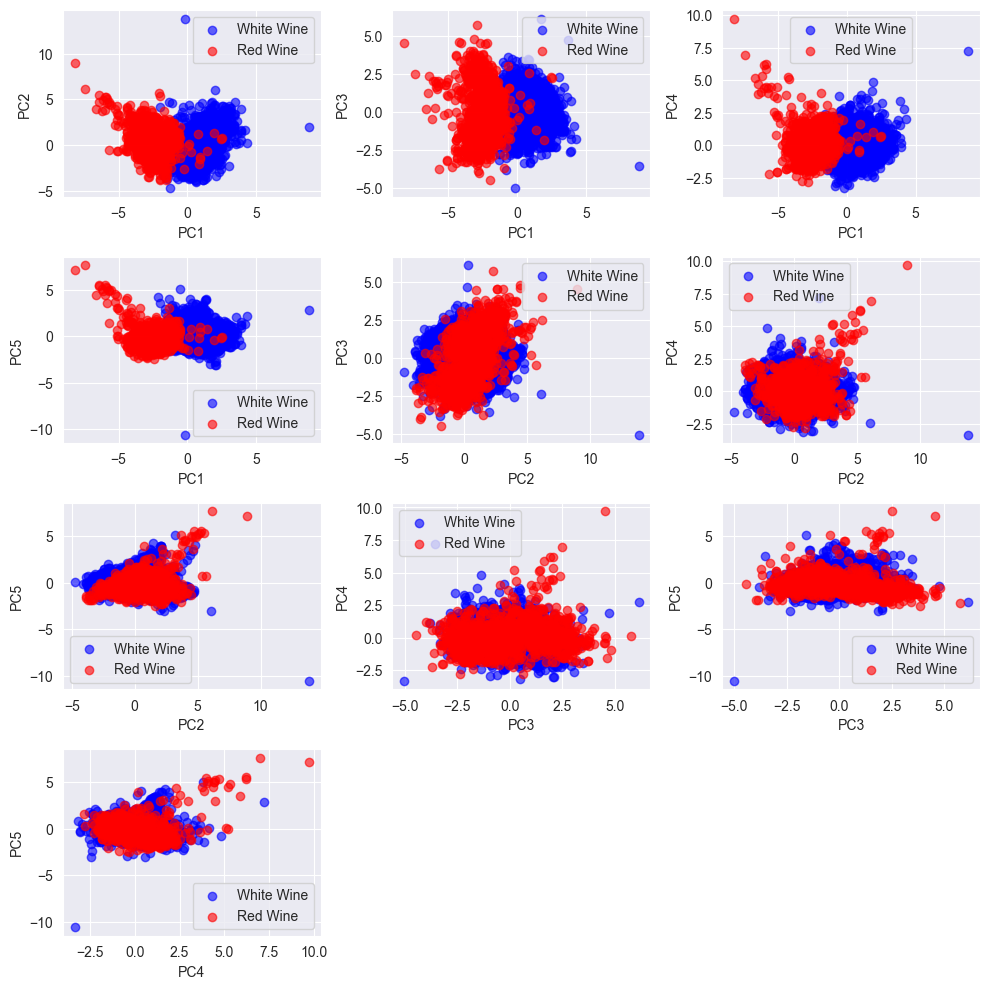

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
y_color_numeric = y_color.map({'white': 0, 'red': 1})

pairs = [(i, j) for i in range(5) for j in range(i+1, 5)]
n_plots = len(pairs)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
axes = axes.ravel()

colors = {0: 'blue', 1: 'red'}
labels = {0: 'White Wine', 1: 'Red Wine'}

for idx, (i, j) in enumerate(pairs):
    for color, label in labels.items():
        subset = X_pca[y_color_numeric == color]
        axes[idx].scatter(subset[:, i], subset[:, j], c=colors[color], label=label, alpha=0.6)
    axes[idx].set_xlabel(f'PC{i+1}')
    axes[idx].set_ylabel(f'PC{j+1}')
    axes[idx].legend()

for k in range(idx+1, n_rows*n_cols):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()


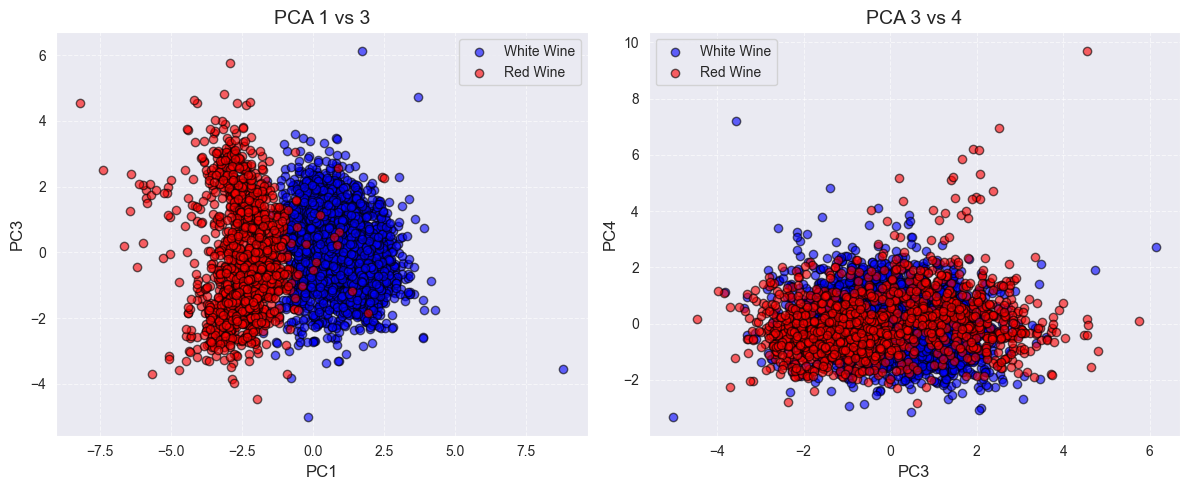

In [18]:
pairs = [(0, 2), (2, 3)]  # PC1 vs PC3, PC3 vs PC4

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

colors = {0: 'blue', 1: 'red'}
labels = {0: 'White Wine', 1: 'Red Wine'}

for idx, (i, j) in enumerate(pairs):
    for color, label in labels.items():
        subset = X_pca[y_color_numeric == color]
        axes[idx].scatter(subset[:, i], subset[:, j], c=colors[color], label=label, alpha=0.6, edgecolors='k')
    axes[idx].set_xlabel(f'PC{i+1}', fontsize=12)
    axes[idx].set_ylabel(f'PC{j+1}', fontsize=12)
    axes[idx].set_title(f'PCA {i+1} vs {j+1}', fontsize=14)
    axes[idx].legend()
    axes[idx].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


/var/folders/z6/0dqw2m7n37l5vjqcv_822tdr0000gn/T/ipykernel_38049/2990337566.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


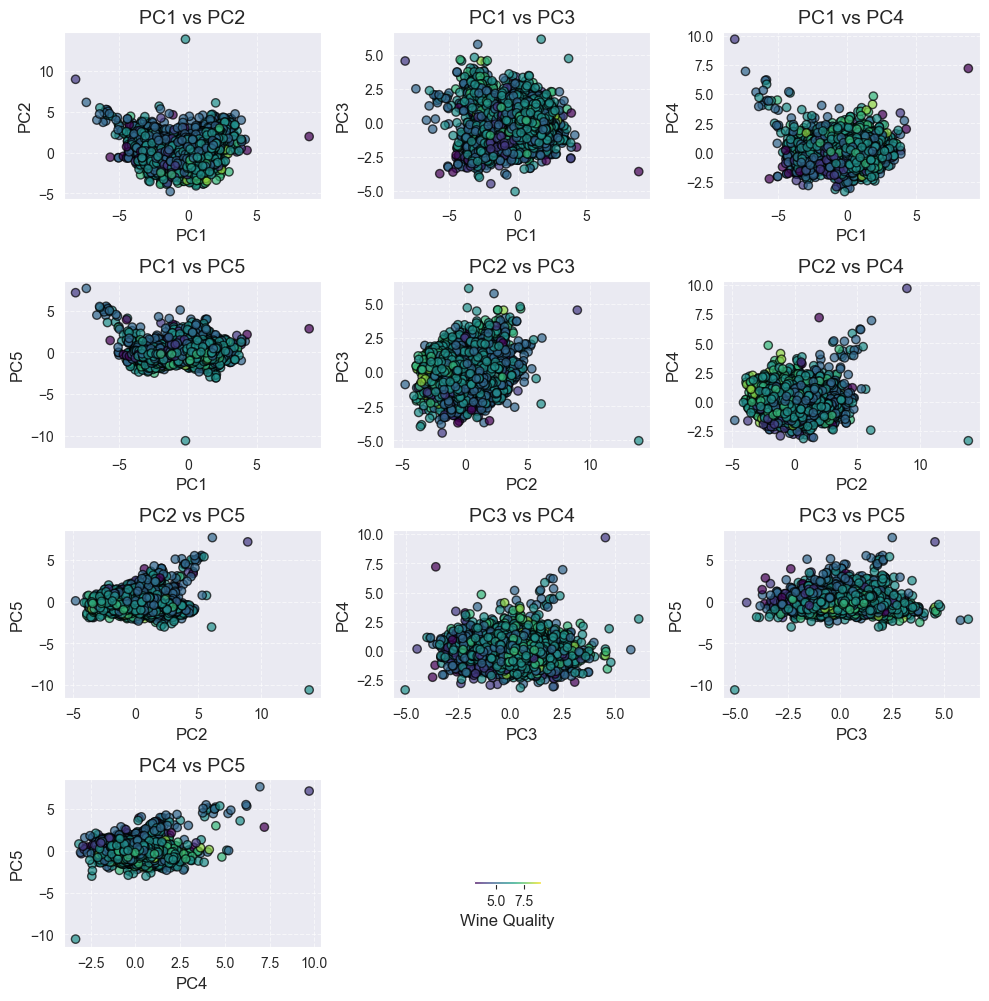

In [16]:
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

pairs = [(i, j) for i in range(5) for j in range(i+1, 5)]
n_plots = len(pairs)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
axes = axes.ravel()

sc = None
for idx, (i, j) in enumerate(pairs):
    sc = axes[idx].scatter(X_pca[:, i], X_pca[:, j], c=y_quality, cmap='viridis', alpha=0.7, edgecolors='k')
    axes[idx].set_xlabel(f'PC{i+1}', fontsize=12)
    axes[idx].set_ylabel(f'PC{j+1}', fontsize=12)
    axes[idx].set_title(f'PC{i+1} vs PC{j+1}', fontsize=14)
    axes[idx].grid(True, linestyle='--', alpha=0.6)

for k in range(idx+1, n_rows*n_cols):
    fig.delaxes(axes[k])

cbar = fig.colorbar(sc, ax=axes[-3:], orientation='horizontal', fraction=0.02, pad=0.05)
cbar.set_label("Wine Quality", fontsize=12)

plt.tight_layout()
plt.show()